A first implementation of a node-induced subgraph isomorphism counting algorithm, with some toy data to check it works.

In [1]:
# Only run once, unless restarting kernel
import os
os.chdir('../')
print(os.getcwd())  # Should output the project folder

/home/vlad/Desktop/lmu_bachelor_thesis/code/VariationalInformationPursuit


In [2]:
import networkx as nx

Toy Graphs

[(0, {'atoms': 'H'}), (2, {'atoms': 'N'}), (1, {'atoms': 'H'}), (3, {'atoms': 'C'})]
[(0, 2, {'bonds': 1}), (2, 1, {'bonds': 1}), (2, 3, {'bonds': 2})]


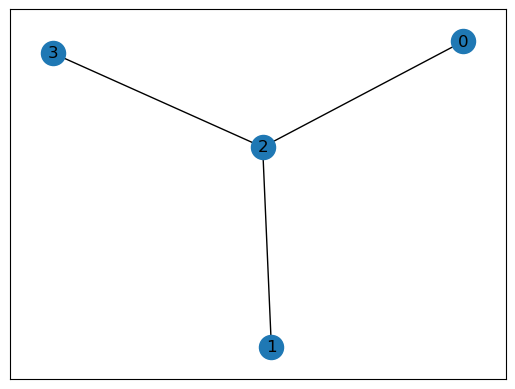

In [3]:
edgelist = [(0, 2), (1, 2), (2, 3)]
A = nx.Graph(edgelist)

A.nodes[0]['atoms'] = 'H'
A.nodes[1]['atoms'] = 'H'
A.nodes[2]['atoms'] = 'N'
A.nodes[3]['atoms'] = 'C'

A.edges[0, 2]['bonds'] = 1
A.edges[1, 2]['bonds'] = 1
A.edges[2, 3]['bonds'] = 2

print(A.nodes.data())
print(A.edges.data())
nx.draw_networkx(A, with_labels=True)

[(0, {'atoms': 'H'}), (2, {'atoms': 'N'}), (1, {'atoms': 'H'}), (3, {'atoms': 'C'})]
[(0, 2, {'bonds': 2}), (2, 1, {'bonds': 2}), (2, 3, {'bonds': 2})]


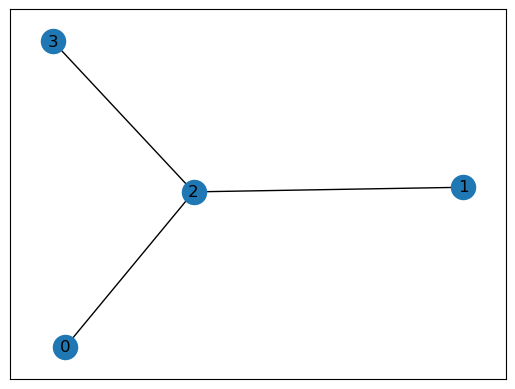

In [4]:
edgelist = [(0, 2), (1, 2), (2, 3)]
B = nx.Graph(edgelist)

B.nodes[0]['atoms'] = 'H'
B.nodes[1]['atoms'] = 'H'
B.nodes[2]['atoms'] = 'N'
B.nodes[3]['atoms'] = 'C'

B.edges[0, 2]['bonds'] = 2
B.edges[1, 2]['bonds'] = 2
B.edges[2, 3]['bonds'] = 2

print(B.nodes.data())
print(B.edges.data())
nx.draw_networkx(B, with_labels=True)

[(0, {'atoms': 'H'}), (2, {'atoms': 'N'}), (1, {'atoms': 'H'}), (3, {'atoms': 'C'})]
[(0, 2, {'bonds': 1}), (0, 1, {'bonds': 1}), (2, 1, {'bonds': 1}), (2, 3, {'bonds': 2})]


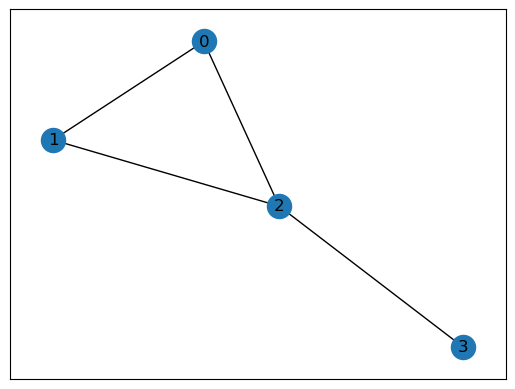

In [5]:
edgelist = [(0, 2), (1, 2), (2, 3), (0, 1)]
C = nx.Graph(edgelist)

C.nodes[0]['atoms'] = 'H'
C.nodes[1]['atoms'] = 'H'
C.nodes[2]['atoms'] = 'N'
C.nodes[3]['atoms'] = 'C'

C.edges[0, 2]['bonds'] = 1
C.edges[1, 2]['bonds'] = 1
C.edges[2, 3]['bonds'] = 2
C.edges[0, 1]['bonds'] = 1

print(C.nodes.data())
print(C.edges.data())
nx.draw_networkx(C, with_labels=True)

The graph to check for isomorphisms for in subgraphs of the toy graphs. (i.e. The functional group)

[(0, {'atoms': 'H'}), (2, {'atoms': 'N'}), (1, {'atoms': 'H'})]
[(0, 2, {'bonds': 1}), (2, 1, {'bonds': 1})]


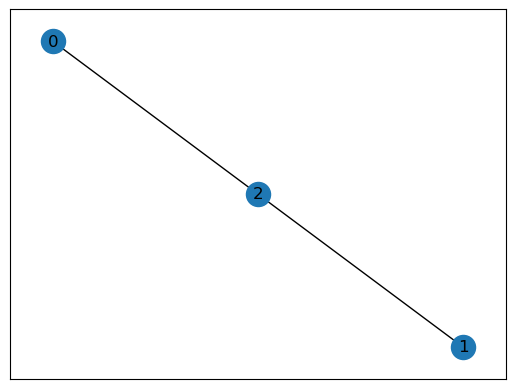

In [6]:
edgelist = [(0, 2), (1, 2)]
func_group = nx.Graph(edgelist)

func_group.nodes[0]['atoms'] = 'H'
func_group.nodes[1]['atoms'] = 'H'
func_group.nodes[2]['atoms'] = 'N'

func_group.edges[0, 2]['bonds'] = 1
func_group.edges[1, 2]['bonds'] = 1

print(func_group.nodes.data())
print(func_group.edges.data())
nx.draw_networkx(func_group, with_labels=True)

Yield isomorphic mappings between functional_group and subgraphs of graph G:

In [7]:
from feature_engineering.motif_features import *

In [8]:
isomatcher = nx.isomorphism.GraphMatcher(A, func_group, node_match=node_match, edge_match=edge_match)
matches = list(isomatcher.subgraph_isomorphisms_iter())   
print(matches)

[{0: 0, 2: 2, 1: 1}, {1: 0, 2: 2, 0: 1}]


Problem: It's counting two isomorphisms since they technically have different mapping, but chemically these are the same molecules. We resolve the issue by looking at the nodes in the mappings as a set rather than an ordered list:

In [9]:
isomatcher = nx.isomorphism.GraphMatcher(A, func_group, node_match=node_match, edge_match=edge_match)
unique_matches = unique_subgraph_isomorphisms(isomatcher)
print(unique_matches)

[{0: 0, 2: 2, 1: 1}]


Now Graph B:

In [10]:
isomatcher = nx.isomorphism.GraphMatcher(B, func_group, node_match=node_match, edge_match=edge_match)
matches = list(isomatcher.subgraph_isomorphisms_iter())   
print(matches)

[]


In [11]:
isomatcher = nx.isomorphism.GraphMatcher(B, func_group, node_match=node_match, edge_match=edge_match)
unique_matches = unique_subgraph_isomorphisms(isomatcher)
print(unique_matches)

[]


Now Graph C:

In [12]:
isomatcher = nx.isomorphism.GraphMatcher(B, func_group, node_match=node_match, edge_match=edge_match)
matches = list(isomatcher.subgraph_isomorphisms_iter())   
print(matches)

[]


In [13]:
isomatcher = nx.isomorphism.GraphMatcher(B, func_group, node_match=node_match, edge_match=edge_match)
unique_matches = unique_subgraph_isomorphisms(isomatcher)
print(unique_matches)

[]


Let's count now.

In [14]:
count_node_induced_subgraph_isomorphisms(A, func_group)

(1, [{0: 0, 2: 2, 1: 1}])

I need to test this algorithm now somehow. I should come up with edge cases. Or alternatively, maybe I can mathematically prove the correctness of this algorithm somehow.